In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
print(penguins_df.isna().sum().sort_values()) #checking for null values

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [4]:
penguins_dummies = pd.get_dummies(penguins_df, drop_first=True) #creating dummies for the sex column
print(penguins_dummies.head()) #making sure it worked as intended

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1


In [5]:
#scaling the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_dummies)

In [6]:
#Here we're trying to find the best number of clusters using elbow analysis

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(penguins_scaled)
    model.predict(penguins_scaled)
    inertias.append(model.inertia_)

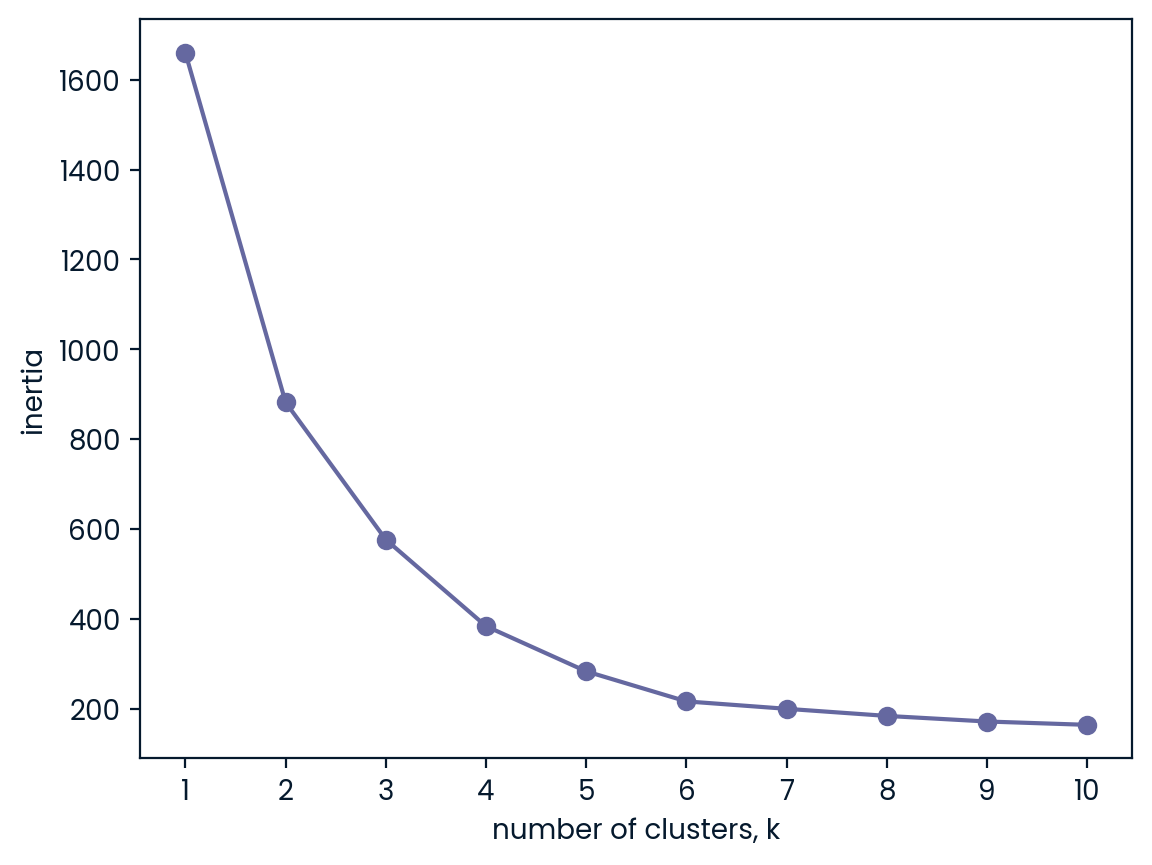

In [7]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [8]:
#creating a KMeans model with n_clusters=4 which was determined from the above plot

kmeans = KMeans(n_clusters=4)
kmeans.fit(penguins_scaled)
labels = kmeans.predict(penguins_scaled)

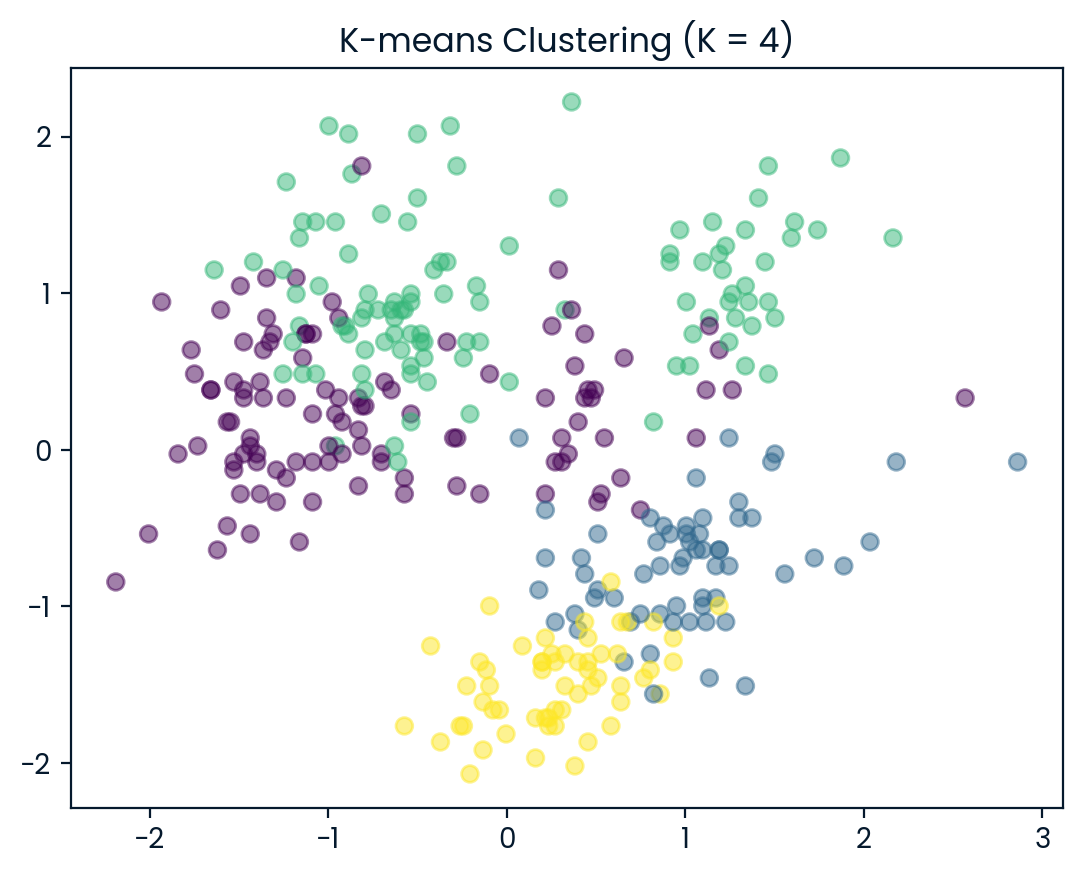

In [9]:
#plotting the clusters

xs = penguins_scaled[:, 0]
ys = penguins_scaled[:, 1]

plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.title('K-means Clustering (K = 4)')
plt.show()

In [10]:
#Displaying mean for numeric columns of the penguins dataset sorted by label
penguins_df['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.217757,17.611215,189.046729
1,49.473770,15.718033,221.540984
2,43.878302,19.111321,194.764151
3,45.563793,14.237931,212.706897


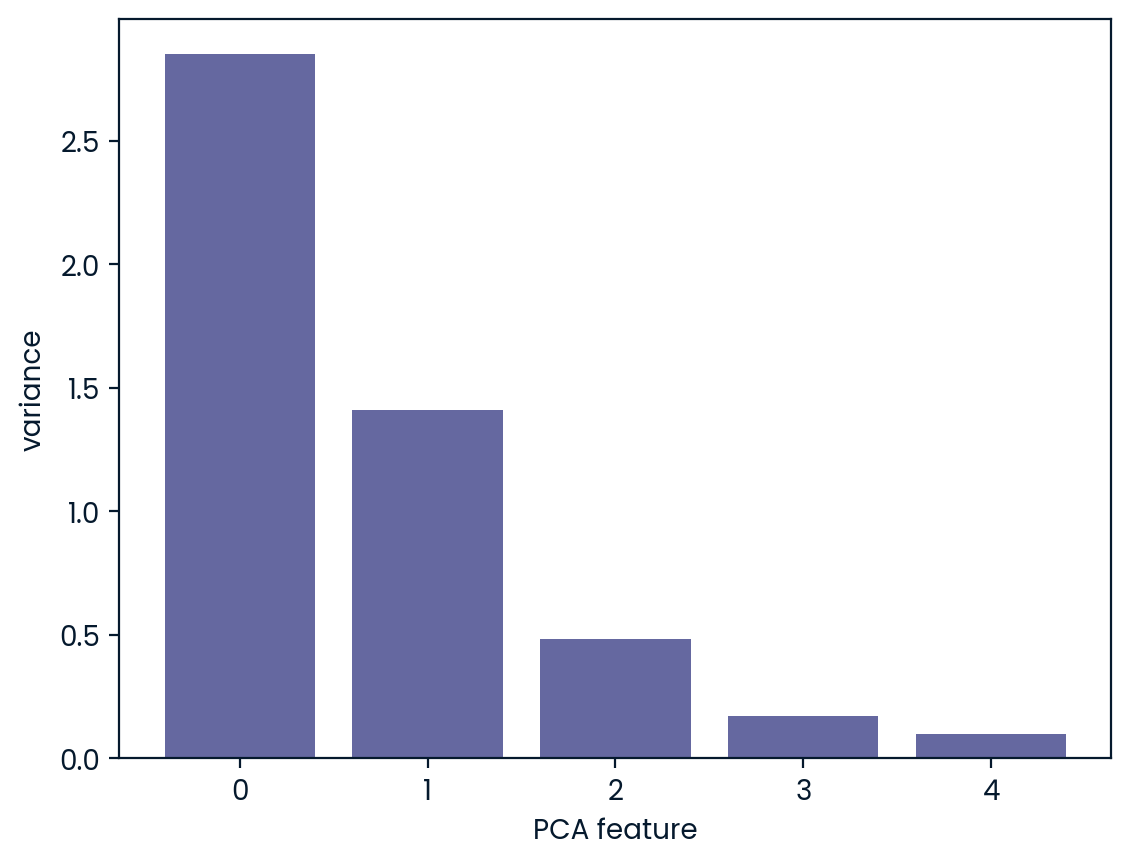

In [14]:
#Additionaly I am going to use PCA to find the intrinsic dimension of the dataset to see how many features do we actually need to label the clusters

from sklearn.decomposition import PCA

pca = PCA()

pca.fit(penguins_scaled) 

# Plot the explained variances
pca_features = range(pca.n_components_)
plt.bar(pca_features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(pca_features)
plt.show()

As seen from the plot above, only the first two PCA features have high or significant variance. Hence, these two features provide us with the most information to cluster our data so the intrinsic dimension of this dataset `penguins.csv` is `2`.